# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('2_Sampled_User_Engagement_Metrics_250k.csv')

In [3]:
df.head(2)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Follow_Up_Actions,Bounce_Rate,Form_Submissions,Engagement_Score,Time_Spent,Follows_On_Social_Media,User_Age,Region,State,Country,View_Mode,Breaking_News,Clicked_Recommended_Article,Bookmarked_Articles,Font_Size,Author,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading
0,strong>Serena Williams overcame a sluggish sta...,3/19/2016,Serena battles past Radwanska to reach Indian...,sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,Facebook,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,No,0.0,Yes,10.00,16.0,Yes,32.0,United States,Ohio,United States,Light Mode,No,Yes,29.0,17.0,Chris Lee,124.0,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0
1,SYDNEY: India badminton ace Saina Nehwal rece...,6/12/16,indias nehwal clinches australian open badmin...,sports,2023-12-06 05:33:45,3/1/15 10:39,mobile,Yes,Yes,Yes,NaN,5.0,1.0,4.0,-2.0,0.35,0.0,3.0,No,0.0,Yes,11.16,27.0,No,27.0,United States,Illinois,United States,Dark Mode,No,No,45.0,14.0,Sarah Davis,305.0,50.0,1.67,1.0,2.0,No,74.0,Yes,8.0,2.0


In [4]:
df.isnull().sum()
df.dropna(inplace=True)
df.shape

(189890, 44)

# Measuring Skewness

In [5]:
float_columns_df = df.select_dtypes(include=['float'])


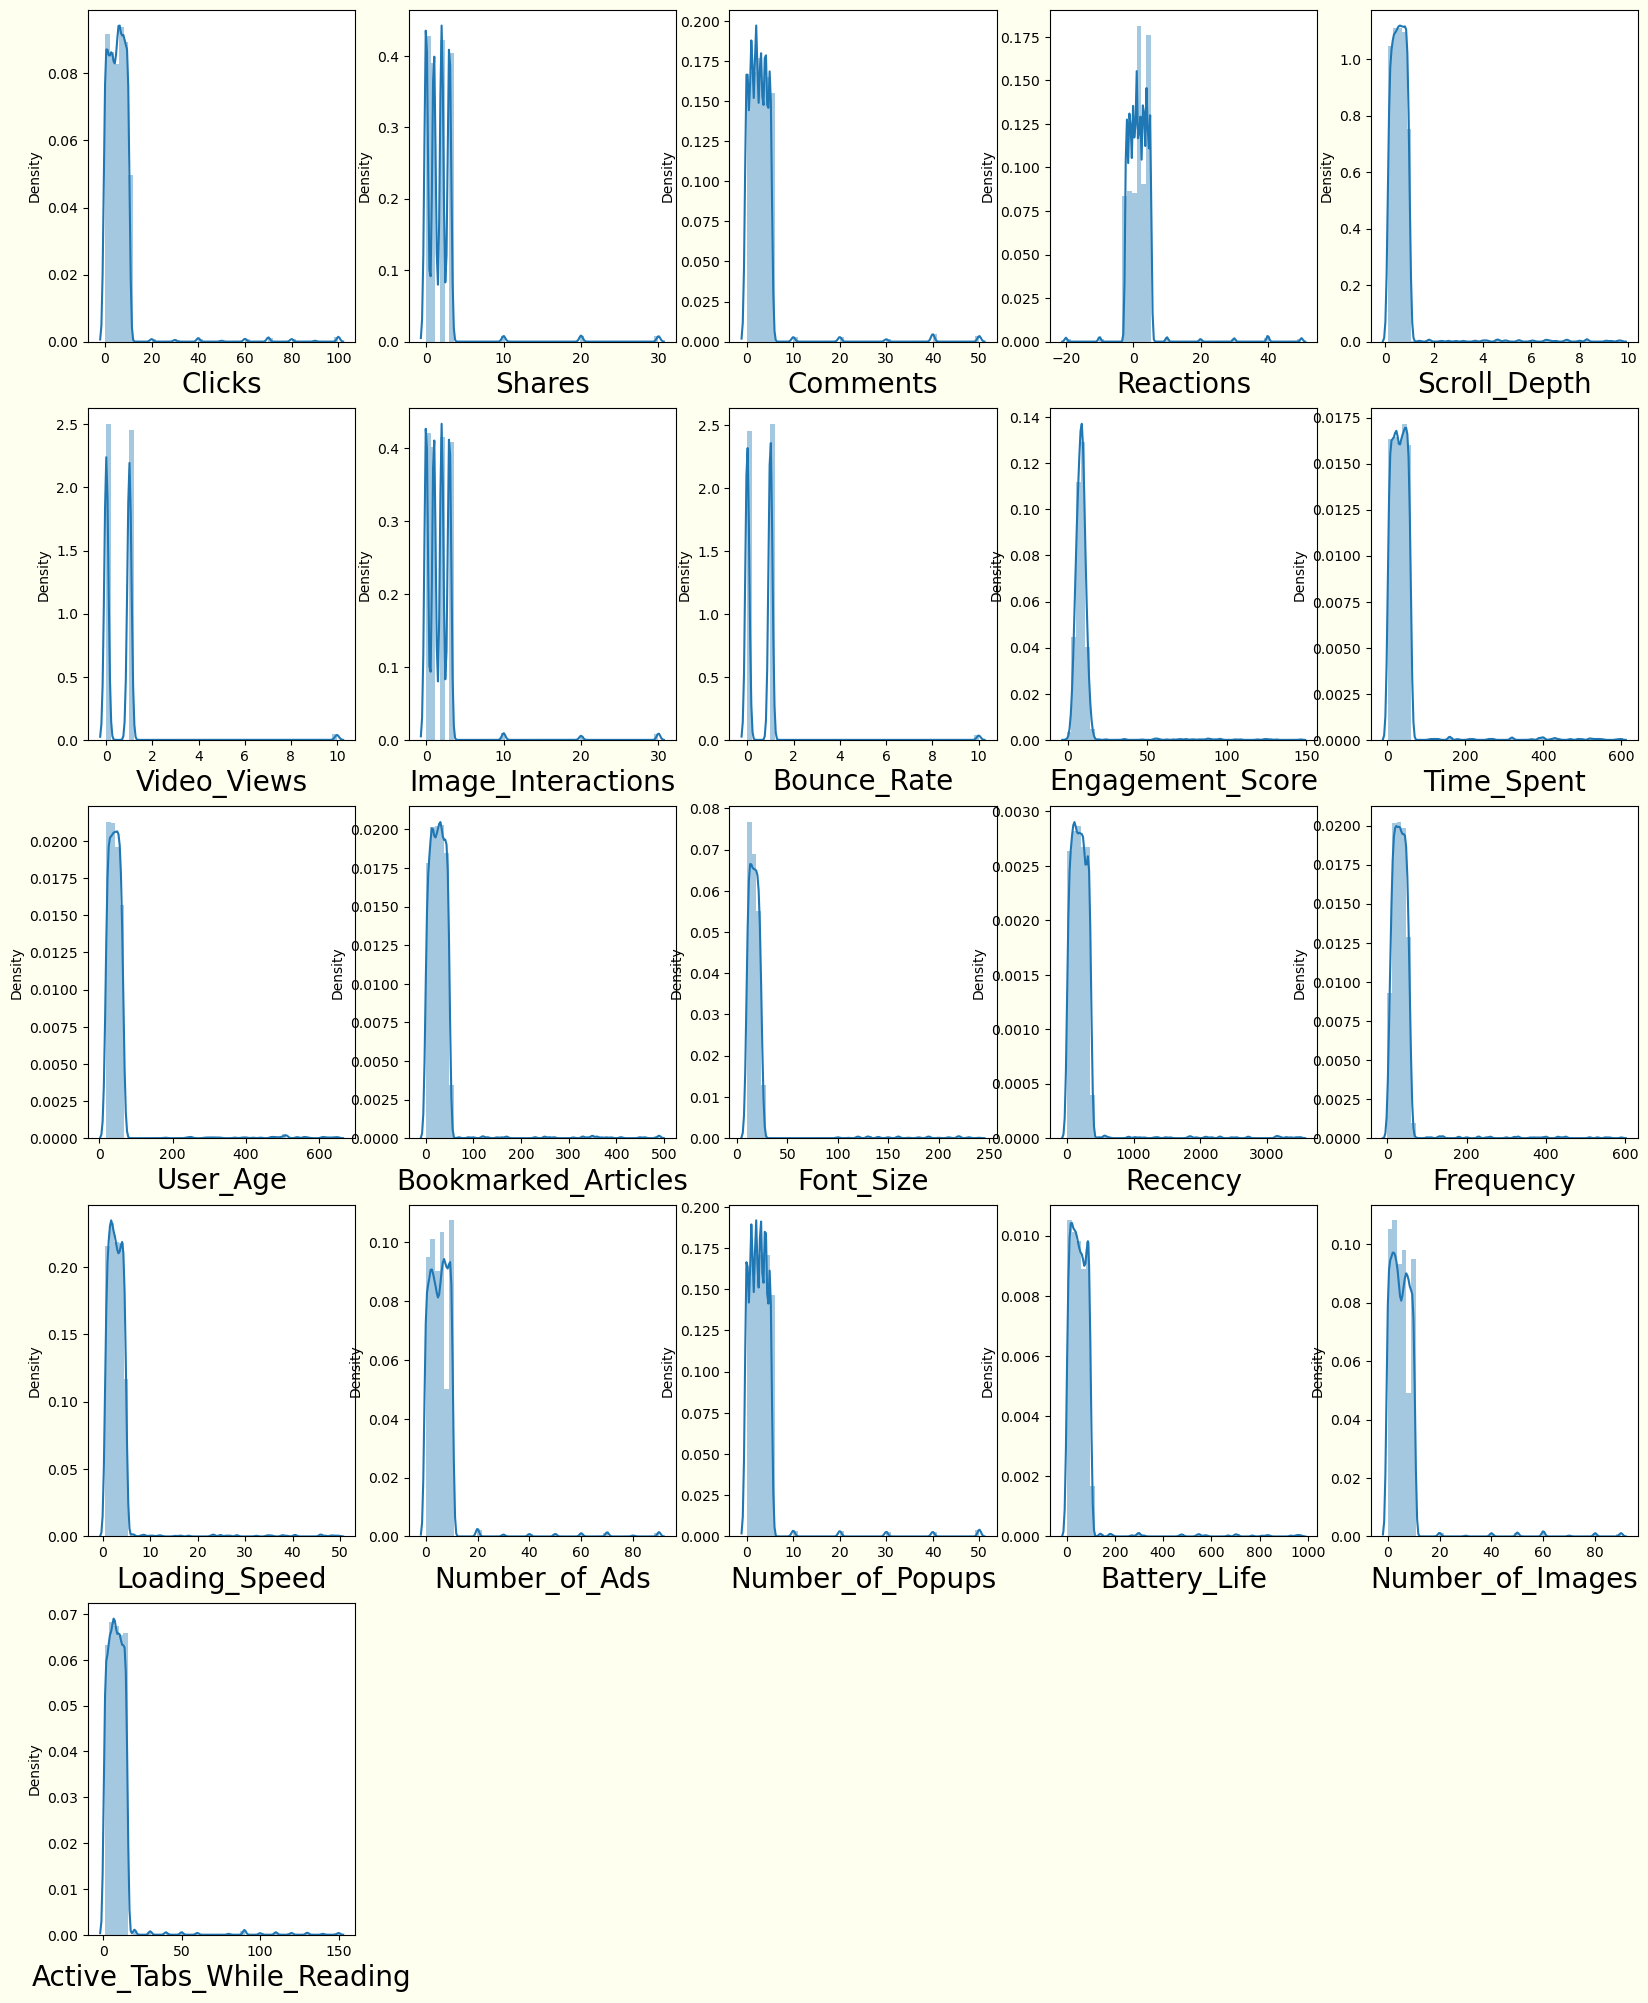

In [6]:
plt.figure(figsize=(20,25), facecolor='ivory')
plotnumber = 1

for column in float_columns_df:
    if plotnumber<=21 :     # as there are 9 columns in the data
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(float_columns_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Outlier Detection

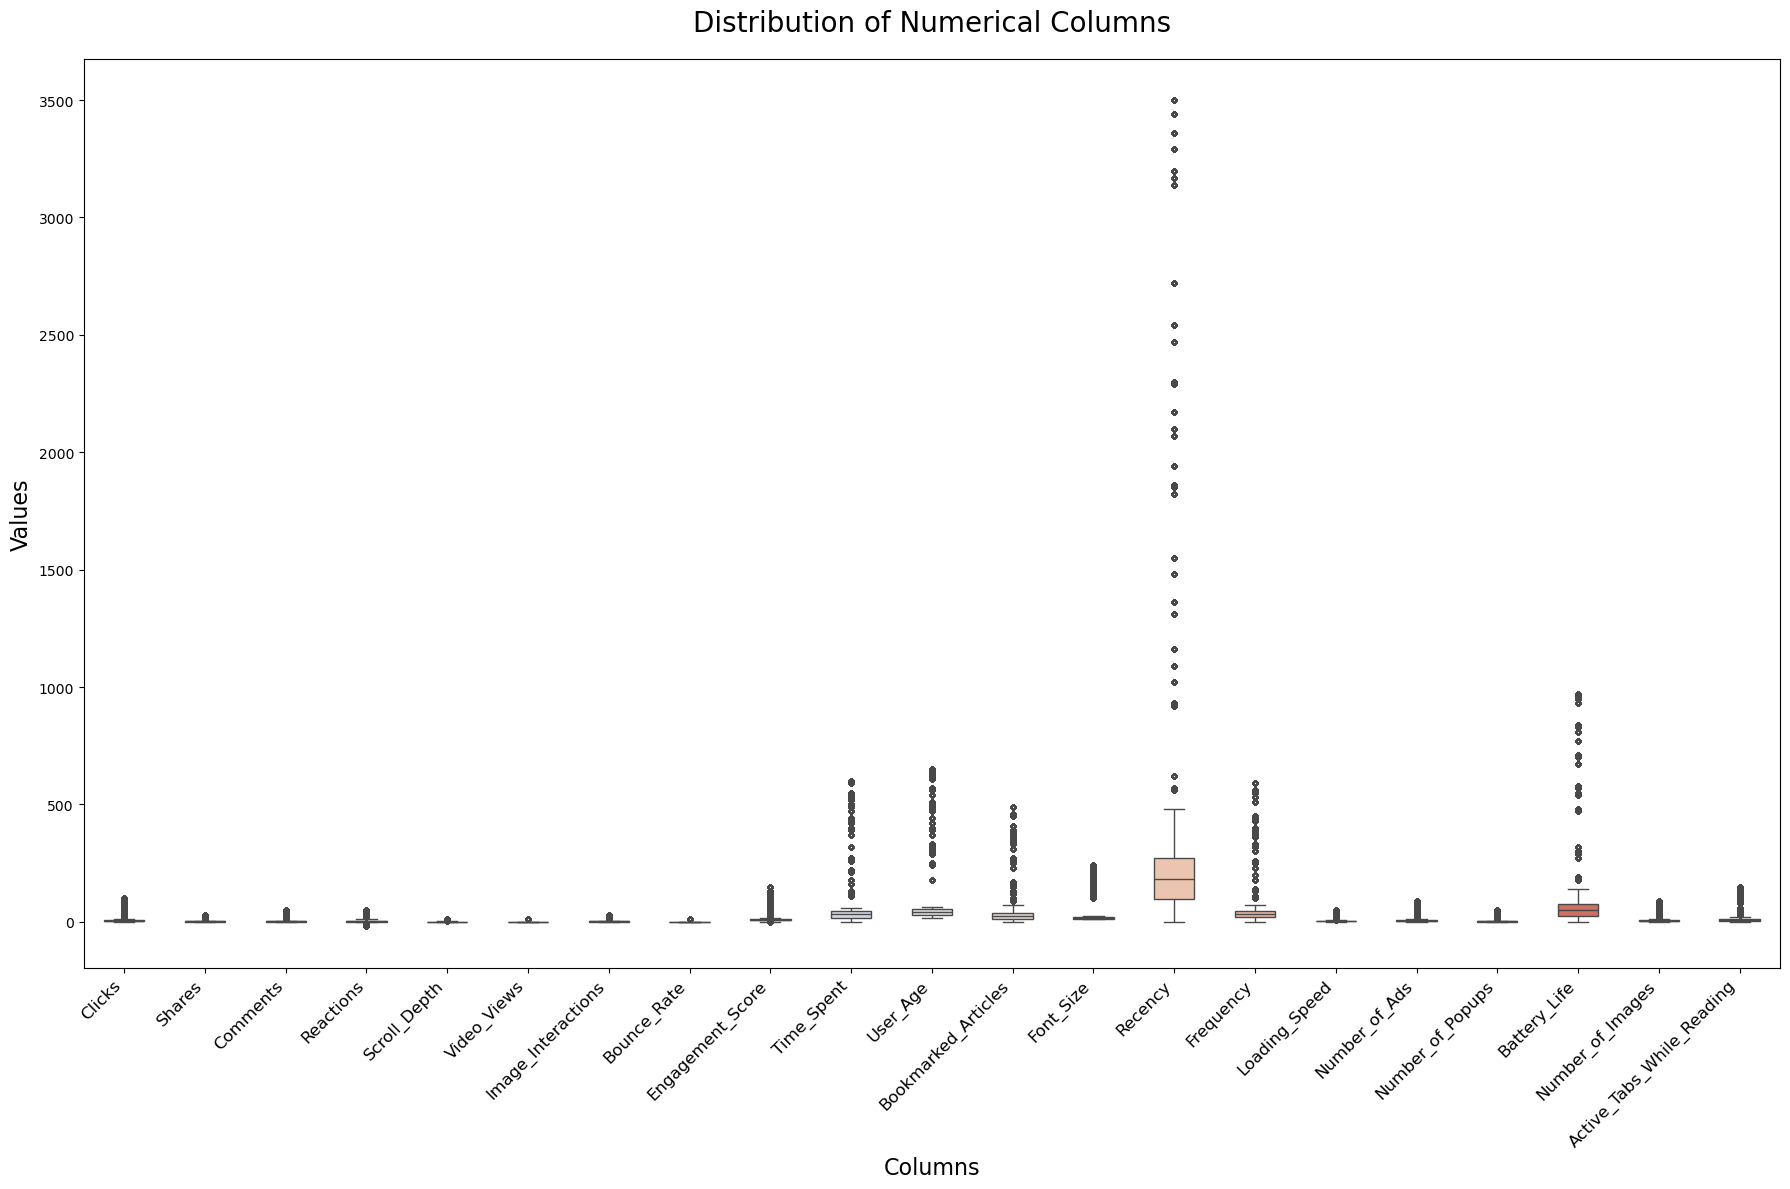

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots(figsize=(18, 12))

# Create the boxplot with improvements
sns.boxplot(data=float_columns_df, width=0.5, ax=ax, fliersize=3, palette='coolwarm')

# Set the title and axis labels
ax.set_title('Distribution of Numerical Columns', fontsize=20, pad=20)
ax.set_xlabel('Columns', fontsize=16)
ax.set_ylabel('Values', fontsize=16)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
data_cleaned = float_columns_df[
    (float_columns_df['Time_Spent'] < float_columns_df['Time_Spent'].quantile(0.98)) &
    (float_columns_df['User_Age'] < float_columns_df['User_Age'].quantile(0.99)) &
    (float_columns_df['Bookmarked_Articles'] < float_columns_df['Bookmarked_Articles'].quantile(0.99)) &
    (float_columns_df['Font_Size'] < float_columns_df['Font_Size'].quantile(0.99)) &
    (float_columns_df['Recency'] < float_columns_df['Recency'].quantile(0.99)) &
    (float_columns_df['Frequency'] < float_columns_df['Frequency'].quantile(0.99)) &
    (float_columns_df['Battery_Life'] < float_columns_df['Battery_Life'].quantile(0.95))
].reset_index(drop=True)


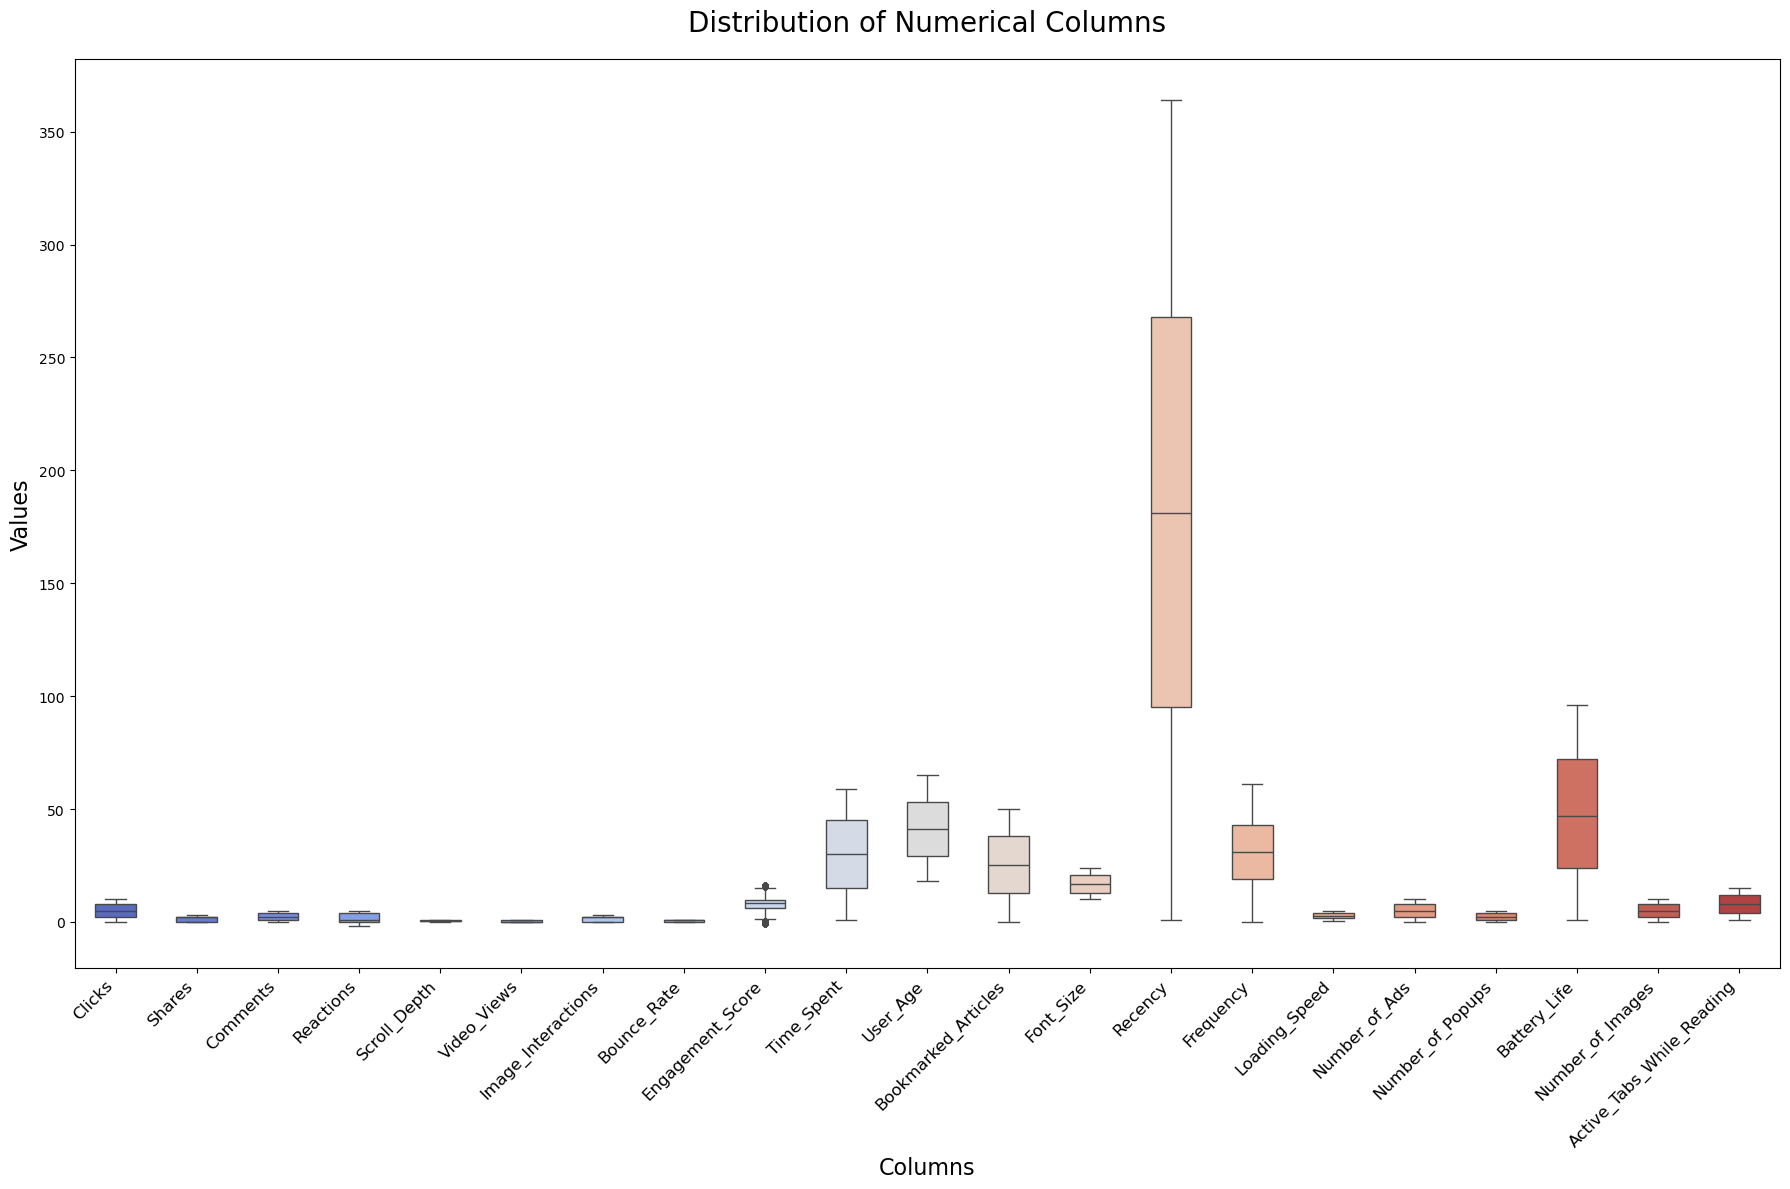

In [9]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(18, 12))

# Create the boxplot with improvements
sns.boxplot(data=data_cleaned, width=0.5, ax=ax, fliersize=3, palette='coolwarm')

# Set the title and axis labels
ax.set_title('Distribution of Numerical Columns', fontsize=20, pad=20)
ax.set_xlabel('Columns', fontsize=16)
ax.set_ylabel('Values', fontsize=16)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()


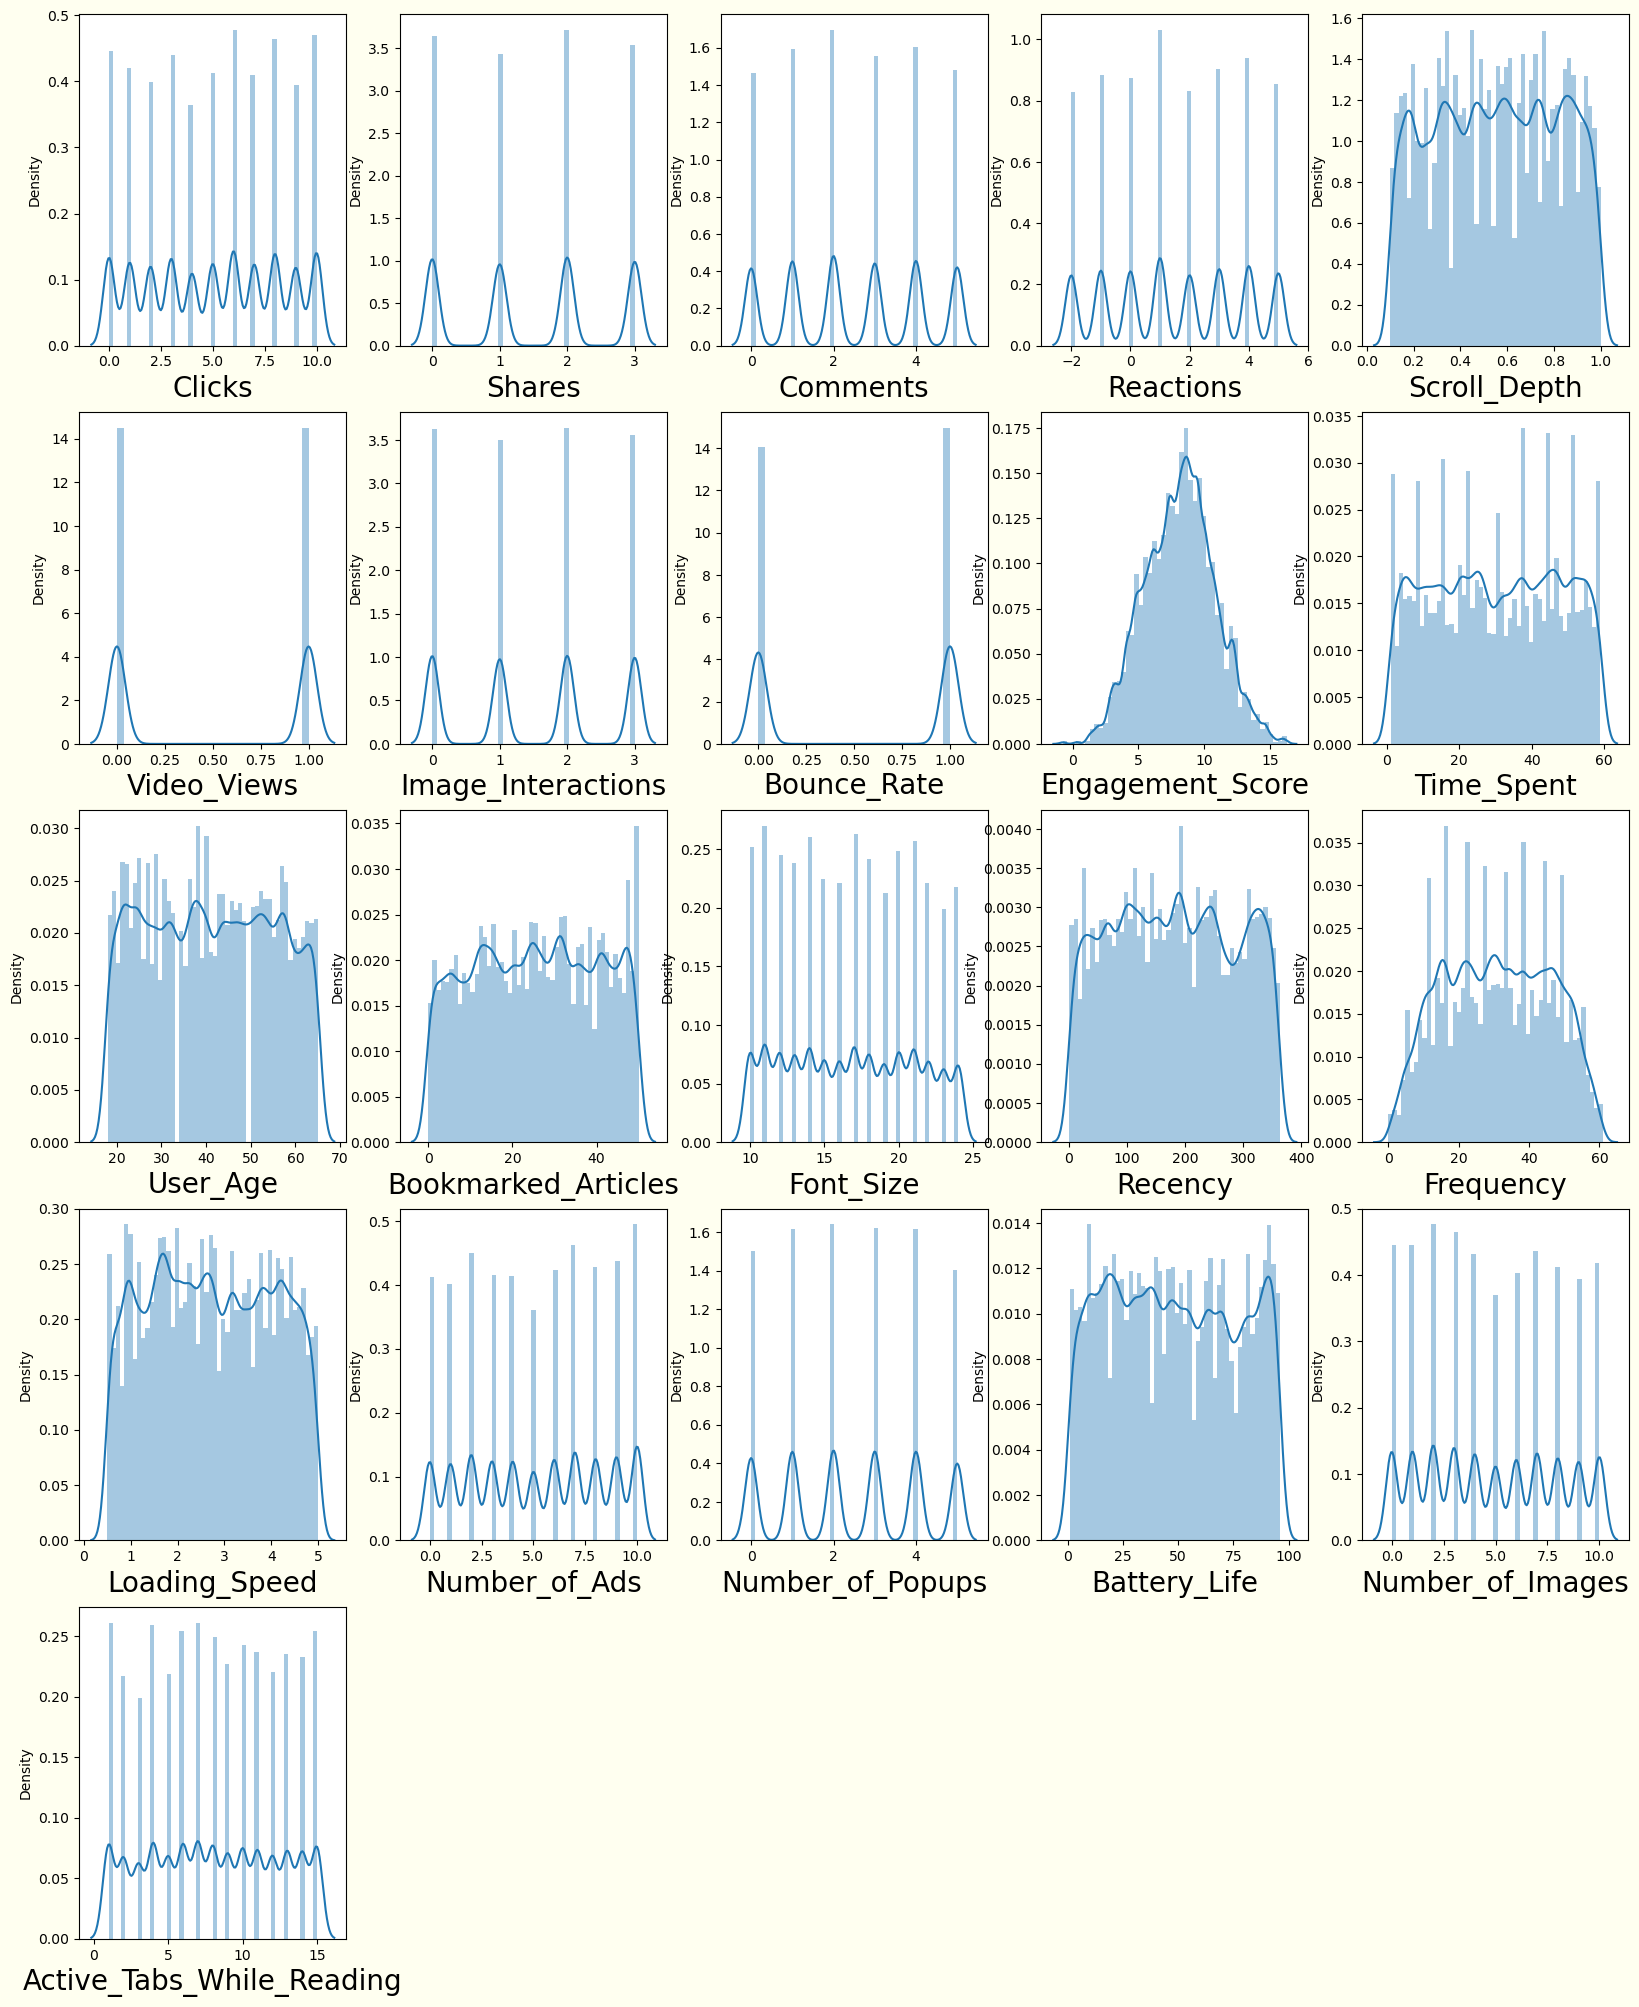

In [10]:
plt.figure(figsize=(20,25), facecolor='ivory')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=21 :     # as there are 9 columns in the data
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Skewness Interpretation Data Dictionary

| Skewness Value     | Interpretation                          |
|--------------------|-----------------------------------------|
| 0                  | Perfectly symmetrical distribution      |
| -0.5 to 0.5        | Approximately symmetrical               |
| < -0.5             | Negatively skewed (left-skewed)         |
| > 0.5              | Positively skewed (right-skewed)        |


In [11]:
skewness_df = data_cleaned.skew().reset_index()
skewness_df.columns = ['Column', 'Skewness']

# Display the skewness DataFrame
print(skewness_df)

                       Column  Skewness
0                      Clicks -0.033962
1                      Shares -0.012791
2                    Comments  0.008853
3                   Reactions -0.005873
4                Scroll_Depth -0.028031
5                 Video_Views  0.000361
6          Image_Interactions -0.004511
7                 Bounce_Rate -0.064313
8            Engagement_Score  0.015598
9                  Time_Spent -0.013282
10                   User_Age  0.018593
11        Bookmarked_Articles -0.025257
12                  Font_Size  0.043768
13                    Recency  0.021428
14                  Frequency -0.006374
15              Loading_Speed  0.029237
16              Number_of_Ads -0.038050
17           Number_of_Popups  0.013378
18               Battery_Life  0.061219
19           Number_of_Images  0.067095
20  Active_Tabs_While_Reading -0.001821


In [12]:
# Create a DataFrame with only categorical columns

categorical_df = df.select_dtypes(exclude=['float'])


In [13]:
# Reset the index of both DataFrames to ensure alignment
data_cleaned.reset_index(drop=True, inplace=True)
categorical_df.reset_index(drop=True, inplace=True)

# Combine the cleaned numerical and original categorical DataFrames
final_df = pd.concat([categorical_df, data_cleaned], axis=1)


In [14]:
final_df.shape

(189890, 44)

In [15]:
# final_df.de

In [16]:
# Replace each column's null values with its mean value
# Fill null values with mean values directly
final_df.fillna(data_cleaned.mean(), inplace=True)

# Check if there are any null values left
print(final_df.isnull().sum())


Article                        0
Date                           0
Heading                        0
NewsType                       0
Access_Timestamp               0
Exit_Timestamp                 0
Device                         0
Subscribed_To_Notifications    0
Opted_Into_Email               0
App_Installed                  0
Referring_Website              0
Follow_Up_Actions              0
Form_Submissions               0
Follows_On_Social_Media        0
Region                         0
State                          0
Country                        0
View_Mode                      0
Breaking_News                  0
Clicked_Recommended_Article    0
Author                         0
Listened_to_Audio              0
Reached_Bottom_of_Article      0
Clicks                         0
Shares                         0
Comments                       0
Reactions                      0
Scroll_Depth                   0
Video_Views                    0
Image_Interactions             0
Bounce_Rat

# Exploratory Data Analysis

In [17]:
final_df.shape

(189890, 44)

In [18]:
final_df.head(2)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Follow_Up_Actions,Form_Submissions,Follows_On_Social_Media,Region,State,Country,View_Mode,Breaking_News,Clicked_Recommended_Article,Author,Listened_to_Audio,Reached_Bottom_of_Article,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Bounce_Rate,Engagement_Score,Time_Spent,User_Age,Bookmarked_Articles,Font_Size,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Battery_Life,Number_of_Images,Active_Tabs_While_Reading
0,strong>Serena Williams overcame a sluggish sta...,3/19/2016,Serena battles past Radwanska to reach Indian...,sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,Facebook,No,Yes,Yes,United States,Ohio,United States,Light Mode,No,Yes,Chris Lee,Yes,No,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,0.0,10.00,16.0,32.0,29.0,17.0,124.0,33.0,3.77,3.0,5.0,75.0,6.0,13.0
1,strong>NAGPUR: South Africa will play FridayÂ´...,3/22/16,south africas duminy ruled out of windies g,sports,2023-07-06 11:27:20,10/20/15 5:28,mobile,No,Yes,No,Twitter,Yes,Yes,No,United States,Georgia,United States,Light Mode,No,Yes,Alex Martinez,No,No,0.0,2.0,2.0,3.0,0.48,0.0,2.0,1.0,5.44,41.0,31.0,48.0,16.0,72.0,49.0,1.96,7.0,5.0,3.0,5.0,4.0


# Catagorical to Numerical Values

In [19]:
final_df['Subscribed_To_Notifications'] = df['Subscribed_To_Notifications'].map({'Yes': 1, 'No': 0})
final_df['Opted_Into_Email'] = df['Opted_Into_Email'].map({'Yes': 1, 'No': 0})
final_df['App_Installed'] = df['App_Installed'].map({'Yes': 1, 'No': 0})
final_df['Follow_Up_Actions'] = df['Follow_Up_Actions'].map({'Yes': 1, 'No': 0})
final_df['Form_Submissions'] = df['Form_Submissions'].map({'Yes': 1, 'No': 0})

final_df['Follows_On_Social_Media'] = df['Follows_On_Social_Media'].map({'Yes': 1, 'No': 0})

final_df['Breaking_News'] = df['Breaking_News'].map({'Yes': 1, 'No': 0})
final_df['Clicked_Recommended_Article'] = df['Clicked_Recommended_Article'].map({'Yes': 1, 'No': 0})
final_df['Reached_Bottom_of_Article'] = df['Reached_Bottom_of_Article'].map({'Yes': 1, 'No': 0})


In [20]:
final_df.head(2)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Follow_Up_Actions,Form_Submissions,Follows_On_Social_Media,Region,State,Country,View_Mode,Breaking_News,Clicked_Recommended_Article,Author,Listened_to_Audio,Reached_Bottom_of_Article,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Bounce_Rate,Engagement_Score,Time_Spent,User_Age,Bookmarked_Articles,Font_Size,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Battery_Life,Number_of_Images,Active_Tabs_While_Reading
0,strong>Serena Williams overcame a sluggish sta...,3/19/2016,Serena battles past Radwanska to reach Indian...,sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,1.0,1.0,1.0,Facebook,0.0,1.0,1.0,United States,Ohio,United States,Light Mode,0.0,1.0,Chris Lee,Yes,0.0,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,0.0,10.00,16.0,32.0,29.0,17.0,124.0,33.0,3.77,3.0,5.0,75.0,6.0,13.0
1,strong>NAGPUR: South Africa will play FridayÂ´...,3/22/16,south africas duminy ruled out of windies g,sports,2023-07-06 11:27:20,10/20/15 5:28,mobile,NaN,NaN,NaN,Twitter,NaN,NaN,NaN,United States,Georgia,United States,Light Mode,NaN,NaN,Alex Martinez,No,NaN,0.0,2.0,2.0,3.0,0.48,0.0,2.0,1.0,5.44,41.0,31.0,48.0,16.0,72.0,49.0,1.96,7.0,5.0,3.0,5.0,4.0


In [21]:
final_df.to_csv('cleanedDataframe.csv', index=False)
# Save the first 500 rows to a new CSV file
final_df.head(500).to_csv('cleanedDataframe_500rows.csv', index=False)
